<a href="https://colab.research.google.com/github/Chichi213/Daiz_CPE-313/blob/main/Daiz_Hands_on_Activity_2_3_CNN_Network_Architectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 2.3 - CNN Network Architectures

#### Objective(s):

This activity aims to introduce how to use CNN network architectures

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pretrained model in predicting the object
* Evaluate the accuracy of each pretrained model

#### Resources:
* Jupyter Notebook
* MNIST

#### Procedures
Load the necessary libraries

In [ ]:
# install opencv if you haven't
# pip install opencv-python
# pip install pillow

In [ ]:
from PIL import Image
from keras.preprocessing import image
import numpy as np
import pandas as pd
import cv2
#I can't use scipy, so I used different library like imageio
from imageio import imread

import matplotlib.pyplot as plt


Create a function that will capture and save the image from your webcam

In [ ]:
def get_image(camera):
    retval, im = camera.read()
    return im

In [ ]:
def save_webcam_image(img_path):

    try:
        camera_port = 0
        ramp_frames = 10

        camera = cv2.VideoCapture(camera_port)

        for i in range(ramp_frames):
            retval, im_camera = camera.read()

        retval, im_camera = camera.read()

        im = cv2.resize(im_camera, (224, 224)).astype(np.float32)
        cv2.imwrite(img_path, im)
        del (camera)
        return True
    except ValueError as e:
        print("Image Capture Failed")
    return False

* Test your function.
* Place a clock or any object
* Display the saved image

In [ ]:
img_path = "webcam_test_img.png"

if save_webcam_image(img_path) is False:
    # Webcam not active, use the Dog Image
    img_path = "rocking_chair.jpg"
    print("Using the Test Rocking Chair Image: {}".format(img_path))

C:\Users\CHIZEL\AppData\Local\Temp\ipykernel_1852\1036286552.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  plt.imshow(imread(img_path))


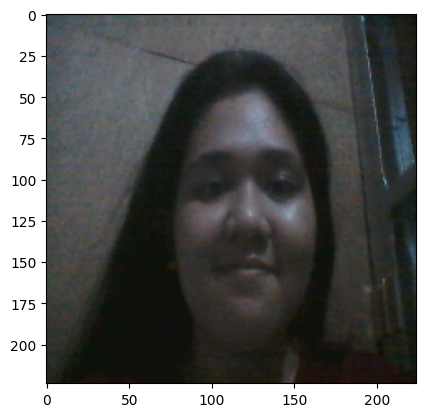

In [ ]:
plt.imshow(imread(img_path))

Use VGG-16 pre-trained model

In [ ]:
from keras.applications import vgg16


vgg16_model = vgg16.VGG16(weights='imagenet')
vgg16_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Create a function to load model, image, preprocess input and targets

In [ ]:
def predict_image(model, img_path, preprocess_input_fn, decode_predictions_fn, target_size=(224, 224)):

    img = image.load_img(img_path, target_size=target_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input_fn(x)

    preds = model.predict(x)
    predictions_df = pd.DataFrame(decode_predictions_fn(preds, top=10)[0])
    predictions_df.columns = ["Predicted Class", "Name", "Probability"]
    return predictions_df

Predict the result

In [ ]:
predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,Predicted Class,Name,Probability
0,n03045698,cloak,0.456868
1,n03788365,mosquito_net,0.128814
2,n02667093,abaya,0.070220
3,n03467068,guillotine,0.031856
4,n04370456,sweatshirt,0.027721
5,n04235860,sleeping_bag,0.014113
6,n02808304,bath_towel,0.014071
7,n04209239,shower_curtain,0.010703
8,n04162706,seat_belt,0.008862
9,n02883205,bow_tie,0.008446


Interpret the result of prediction using VGG16 model

Based from the result table, the cloak got a highest accuracy of 45% among the other result, meaning this model is more confident that the image is closely in cloak.

Use Resnet50 pretrained model

In [ ]:
from keras.applications import resnet50

resnet50_model = resnet50.ResNet50(weights='imagenet')

resnet50_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_21[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

Some of the paramater doesnt need to trained so that is why we have 53,120 of non-trainable params. It means Non-trainable paramaters are no longer learnable in model.

Predict the result

In [ ]:
predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


,Predicted Class,Name,Probability
0,n03467068,guillotine,0.068536
1,n03250847,drumstick,0.062863
2,n03041632,cleaver,0.056366
3,n04350905,suit,0.041954
4,n03045698,cloak,0.039510
5,n03141823,crutch,0.036666
6,n02667093,abaya,0.034128
7,n03970156,plunger,0.033921
8,n15075141,toilet_tissue,0.026259
9,n04532106,vestment,0.022530


Interpret the result using RESNET50 pretrained model

Based from the result in resnet50 the most highest predicated class based from the probability is the guillotine that got of 6% among other predicted classes. to conclude the results, it means that among the list, the clever got the highest score in the prediction it means that that the model is more confident that the image is belong to the cleaver class among the other classes.

#### Supplementary Activity

* Use at least three pretrained model and predict the result using the saved image.
* Compare their accuracy results.

In [ ]:
#Pre-trained model xception_model
from keras.applications import vgg19

vgg19_model = vgg19.VGG19(weights='imagenet')
vgg19_model.summary()


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
predict_image(vgg19_model,img_path, vgg19.preprocess_input, vgg19.decode_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


,Predicted Class,Name,Probability
0,n03045698,cloak,0.346029
1,n02667093,abaya,0.140975
2,n04532106,vestment,0.041432
3,n02883205,bow_tie,0.024199
4,n03467068,guillotine,0.022106
5,n04370456,sweatshirt,0.020401
6,n03814639,neck_brace,0.019024
7,n04418357,theater_curtain,0.015370
8,n03788365,mosquito_net,0.011183
9,n04350905,suit,0.010690


In [ ]:
# Predict using VGG16 model
vgg16_prediction = predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

# Predict using ResNet50 model
resnet50_prediction = predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)


# Print predictions
print("VGG16 Prediction:")
print(vgg16_prediction)

print("\nResNet50 Prediction:")
print(resnet50_prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
VGG16 Prediction:
  Predicted Class            Name  Probability
0       n03045698           cloak     0.456868
1       n03788365    mosquito_net     0.128814
2       n02667093           abaya     0.070220
3       n03467068      guillotine     0.031856
4       n04370456      sweatshirt     0.027721
5       n04235860    sleeping_bag     0.014113
6       n02808304      bath_towel     0.014071
7       n04209239  shower_curtain     0.010703
8       n04162706       seat_belt     0.008862
9       n02883205         bow_tie     0.008446

ResNet50 Prediction:
  Predicted Class           Name  Probability
0       n03467068     guillotine     0.068536
1       n03250847      drumstick     0.062863
2       n03041632        cleaver     0.056366
3       n04350905           suit     0.041954
4       n03045698          cloak     0.039510
5       n03141823         crutch     0.036666
6       n02667093          abaya     0.0341

In [ ]:
# Predict with VGG16
vgg16_predictions = predict_image(vgg16_model, img_path, vgg16.preprocess_input, vgg16.decode_predictions)

# Predict with ResNet50
resnet50_predictions = predict_image(resnet50_model, img_path, resnet50.preprocess_input, resnet50.decode_predictions)

# Compare the predictions
print("VGG16 Predictions:")
print(vgg16_predictions)

print("\nResNet50 Predictions:")
print(resnet50_predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
VGG16 Predictions:
  Predicted Class             Name  Probability
0       n03045698            cloak     0.079348
1       n03788365     mosquito_net     0.061628
2       n02667093            abaya     0.046496
3       n02883205          bow_tie     0.027145
4       n03814639       neck_brace     0.021170
5       n04005630           prison     0.020181
6       n03595614           jersey     0.019686
7       n04532106         vestment     0.018180
8       n04023962     punching_bag     0.016849
9       n04418357  theater_curtain     0.016002

ResNet50 Predictions:
  Predicted Class           Name  Probability
0       n03041632        cleaver     0.109723
1       n03045698          cloak     0.084770
2       n03467068     guillotine     0.076279
3       n03141823         crutch     0.035456
4       n03250847      drumstick     0.033862
5       n02667093          abaya     0.031294
6       n15075141  toilet_tissue 

Based from the result, If we were comparing based from the top 1 accuracy of each result table, the most highest among them is the vgg16 that got an accuracy of 46%, second is the vgg19 that got of accuracy of 35%. The most lowest accuracy among the three pretrained model is resnet50 that got an accuracy of 6% only. To conclude the result, the image is most closely relatable in cloak of vgg16.

#### Conclusion

For this activity we are tasked to perform CNN network architecture. In this activity it introduces the 2 types of pretrained model, the vgg16 and resnet50 for the procedure, and I add vgg19 to meet the requirements in supplementary activity. Utilizing pretrained models in an image processing, it needs to load the model with pretrained weights, after that it will preprocess the input image to match the model requirements and pass it through the model to get a better prediction and interpreting the result to better understand what can be seen in the image. Overall, performing this task helped me to better understand and how to properly use the pretrained models, it also, deepen my knowledge about deep learning.